In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.tail()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
17887,26378,NaN,Zambia,-15.4167,28.2833,2020-03-20,2.0,0.0
17888,26379,NaN,Zambia,-15.4167,28.2833,2020-03-21,2.0,0.0
17889,26380,NaN,Zambia,-15.4167,28.2833,2020-03-22,3.0,0.0
17890,26381,NaN,Zambia,-15.4167,28.2833,2020-03-23,3.0,0.0
17891,26382,NaN,Zambia,-15.4167,28.2833,2020-03-24,3.0,0.0


In [ ]:
df1 = pd.Series(df.ConfirmedCases.values, index=df.Date, name='Covid')

In [ ]:
# fit a linear trend model to the time series
df2 = tsatools.add_trend(df1, trend='ct')
df2.head(10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Covid,const,trend
Date,,,
2020-01-22,0.0,1.0,1.0
2020-01-23,0.0,1.0,2.0
2020-01-24,0.0,1.0,3.0
2020-01-25,0.0,1.0,4.0
2020-01-26,0.0,1.0,5.0
2020-01-27,0.0,1.0,6.0
2020-01-28,0.0,1.0,7.0
2020-01-29,0.0,1.0,8.0
2020-01-30,0.0,1.0,9.0


In [ ]:
df3 = sm.ols(formula='Covid ~ trend',data=df2).fit()

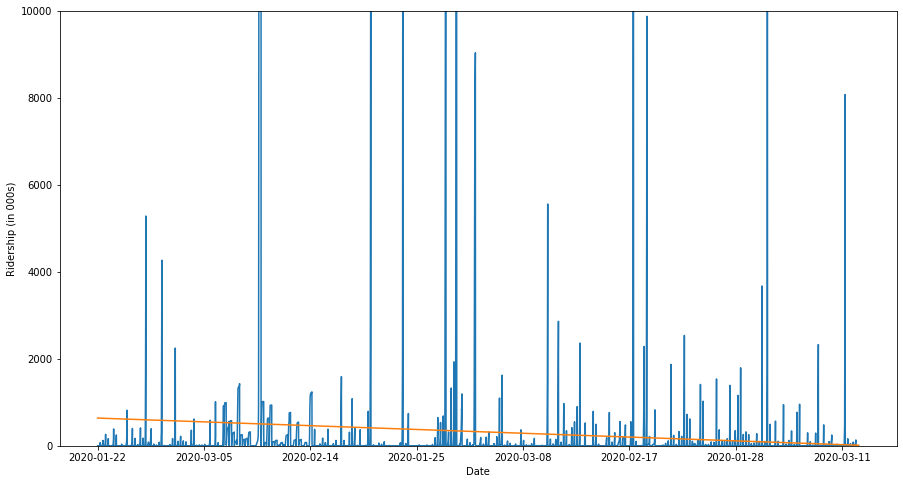

In [ ]:
ax = df1.plot(figsize=(15,8))
ax.set_xlabel("Time")
ax.set_ylabel("Ridership (in 000s)")
ax.set_ylim(0, 10000)
df3.predict(df2).plot(ax=ax)
plt.show()

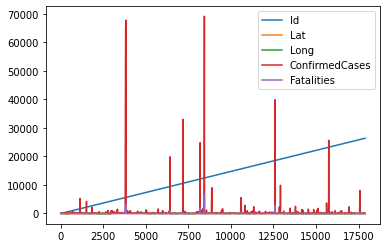

In [ ]:
df.plot()

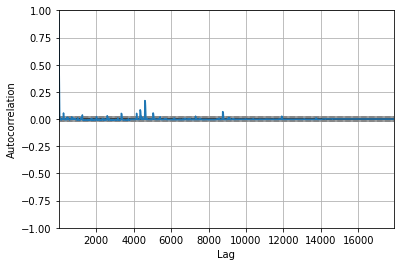

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1);

In [ ]:
model = ARIMA(df1, order=(5,1,0))
model_fit = model.fit(disp=0);

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

,0
count,17891.000000
mean,-0.000002
std,922.805798
min,-68679.084922
25%,-0.000182
50%,-0.000182
75%,0.100087
max,14998.773968


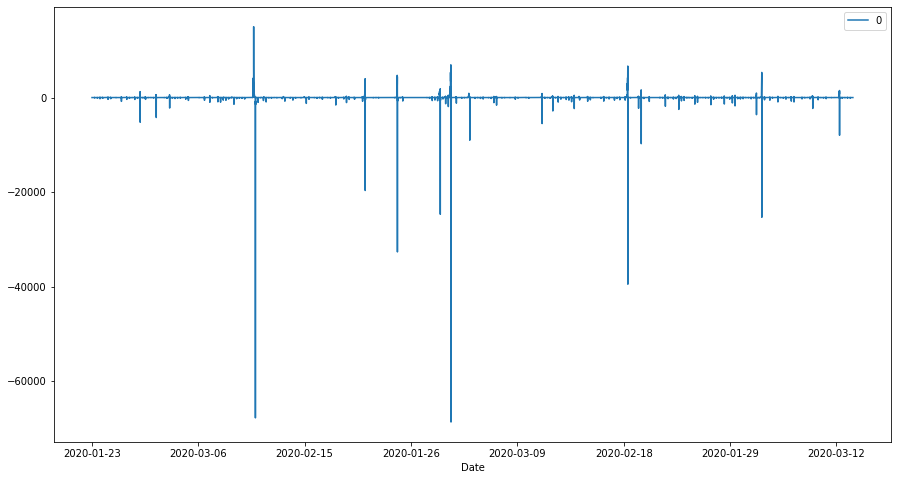

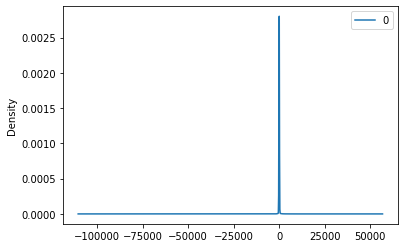

In [ ]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot(figsize=(15,8))
residuals.plot(kind='kde')
residuals.describe()

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error;

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
X = df1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [ ]:
predictions = list()
predictions

[]

In [ ]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=0.000000, expected=0.000000
predicted=-0.000001, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000001, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000001, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000001, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000001, expected=0.000000
predicted=-0.000000, expected=1.000

In [ ]:
df2.index

Index(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
       '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       ...
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
       '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24'],
      dtype='object', name='Date', length=17892)

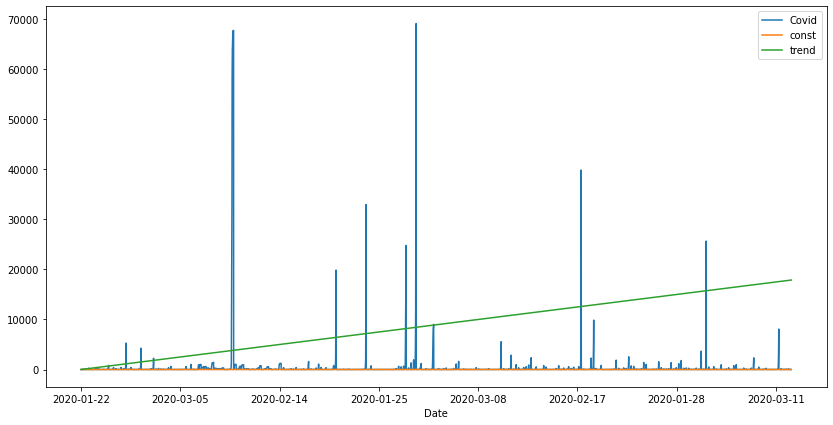

In [ ]:
%matplotlib inline
from matplotlib import pyplot
df2.plot(figsize=(14,7))
pyplot.show;

In [ ]:
df4 = tsatools.add_trend(df2, trend='ctt');

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
df4

,Covid,const,trend,trend,trend_squared
Date,,,,,
2020-01-22,0.0,1.0,1.0,1.0,1.0
2020-01-23,0.0,1.0,2.0,2.0,4.0
2020-01-24,0.0,1.0,3.0,3.0,9.0
2020-01-25,0.0,1.0,4.0,4.0,16.0
2020-01-26,0.0,1.0,5.0,5.0,25.0
...,...,...,...,...,...
2020-03-20,2.0,1.0,17888.0,17888.0,319980544.0
2020-03-21,2.0,1.0,17889.0,17889.0,320016321.0
2020-03-22,3.0,1.0,17890.0,17890.0,320052100.0


In [ ]:
df3 = sm.ols(formula='Covid ~ trend',data=df2).fit()

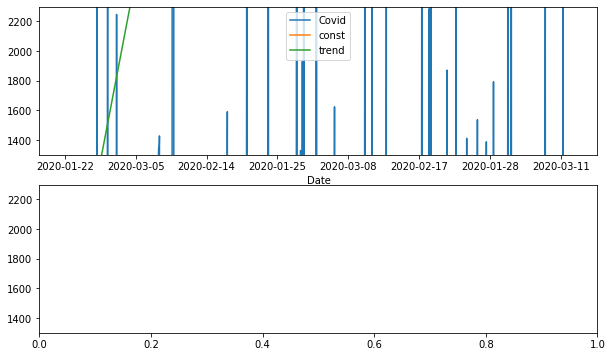

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
df2.plot(ax=axes[0])
for ax in axes:
    ax.set_ylim(1300, 2300)
plt.show()

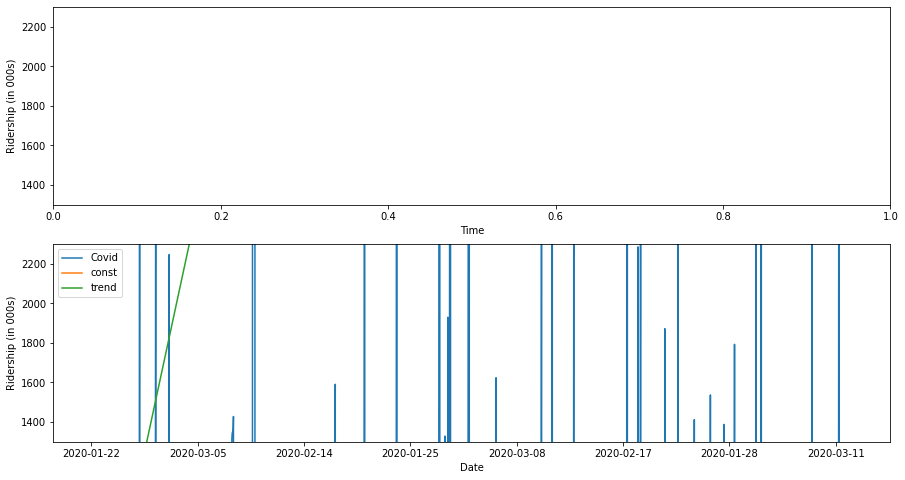

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
df2.plot(ax=axes[1])
for ax in axes:
    ax.set_xlabel('Time')
    ax.set_ylabel('Ridership (in 000s)')
    ax.set_ylim(1300, 2300)
df3.predict(df2).plot(ax=axes[1])
plt.show()

In [ ]:
nValid = 36
nTrain = len(df2) - nValid
train_ts = df2[:nTrain]
valid_ts = df2[nTrain:]

In [ ]:
last_season = train_ts[-30:]
last_season

,Covid,const,trend
Date,,,
2020-03-22,113.0,1.0,17827.0
2020-03-23,123.0,1.0,17828.0
2020-03-24,134.0,1.0,17829.0
2020-01-22,0.0,1.0,17830.0
2020-01-23,0.0,1.0,17831.0
2020-01-24,0.0,1.0,17832.0
2020-01-25,0.0,1.0,17833.0
2020-01-26,0.0,1.0,17834.0
2020-01-27,0.0,1.0,17835.0


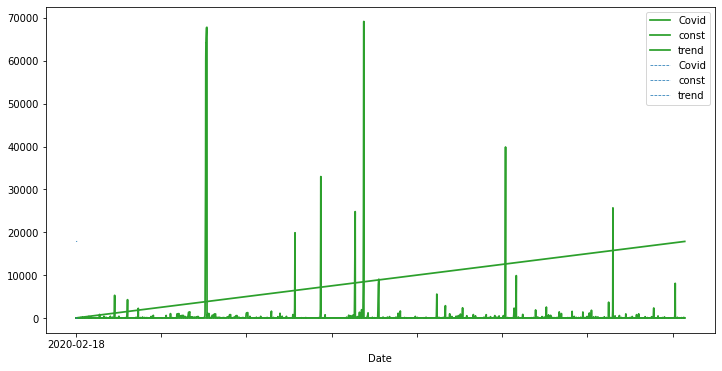

In [ ]:
ax = train_ts.plot(color='C2', linewidth=1.75, figsize=(12,6))
valid_ts.plot(ax=ax, color='C0', linestyle='dashed', linewidth=0.75)